# Case study on Pre-processing

Do the following on titanic dataset.

    1. Load the dataset into python environment

    2. Make ‘PassengerId’ as the index column

    3. Check the basic details of the dataset

    4. Fill in all the missing values present in all the columns in the dataset
    
    5. Check and handle outliers in at least 3 columns in the dataset

    6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Import Dataset

In [392]:
data=pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Make ‘PassengerId’ as the index column

In [393]:
data = data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check the basic details of the dataset

In [394]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [395]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [396]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

<Figure size 1440x864 with 0 Axes>

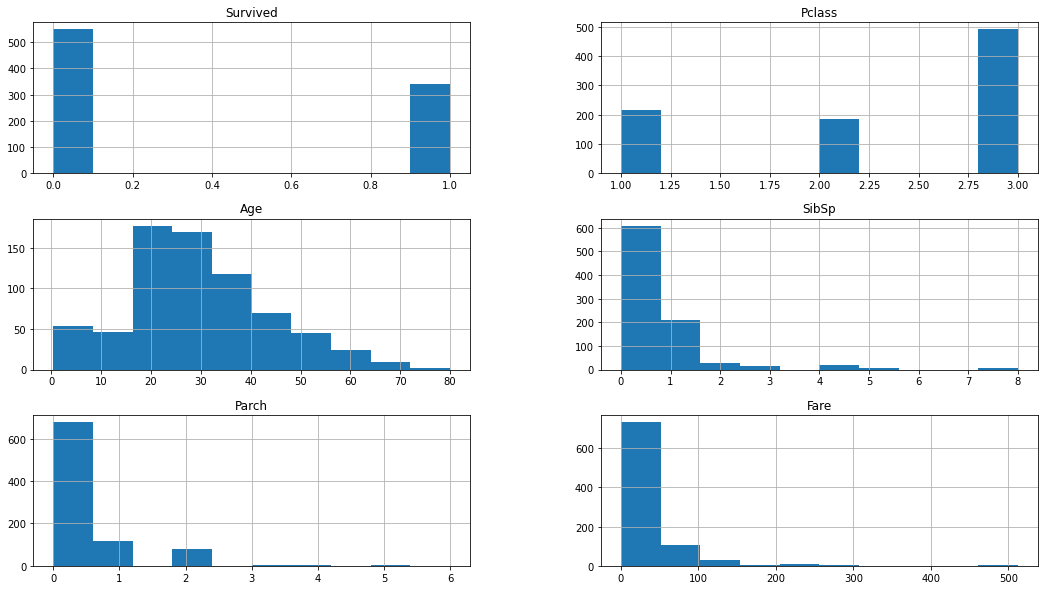

In [397]:
plt.figure(figsize=(20, 12))
data.hist(figsize=(18, 10))

<AxesSubplot:>

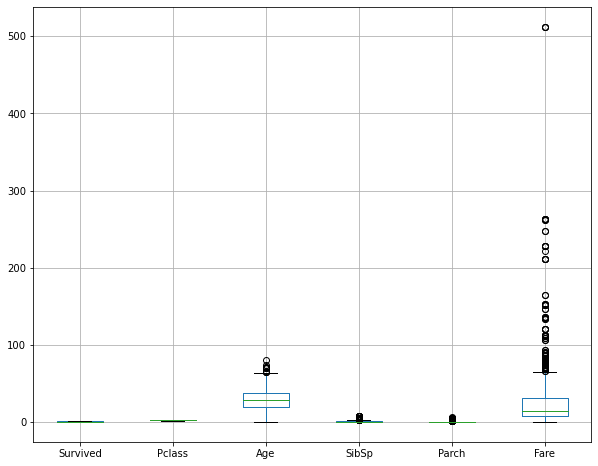

In [398]:
plt.figure(figsize=(10, 8))
data.boxplot()

#### This is the titanic passenger data set. There are 11 features in the dataset and the sample size is 891.

    The average age of the passenger is 29
    The average Fare is 32
    38% of the passenger survived 
    
There are missing values and outliners in the dataset that need be handled.

## Fill in all the missing values present in all the columns in the dataset

In [399]:
#Check null values

In [400]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##### In the dataset, Age, Cabin and Embarked columns contains null values

<AxesSubplot:>

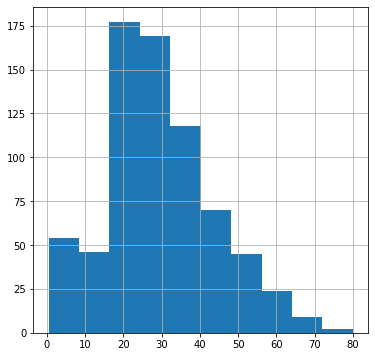

In [401]:
data['Age'].hist(figsize=(6, 6))

Text(0.5, 1.0, 'Box plot of Age')

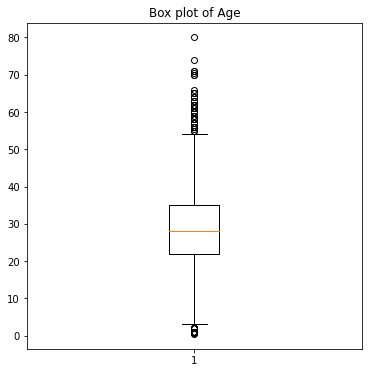

In [417]:
plt.figure(figsize=(6, 6))
plt.boxplot(data['Age'])
plt.title('Box plot of Age')
#data['Age'].boxplot(figsize=(6, 6))

#### The data is normally distributed but skewed and outliners are there in the data, so we can fill the missing values with median

In [418]:
#Filling missing values for Age column

In [419]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [420]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

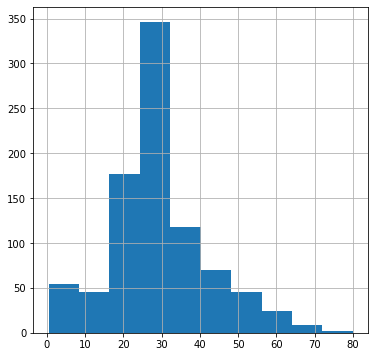

In [421]:
data['Age'].hist(figsize=(6, 6))

In [422]:
#Checking  missing values for Cabin column

In [423]:
data['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [424]:
data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

##### multiple mode values for the column, we can forward and barckward fill the Cabin column 

In [425]:
#Filling missing values for Cabin column

In [426]:
data['Cabin'].fillna(method='bfill',inplace=True)
data['Cabin'].fillna(method='ffill',inplace=True)
#data['Cabin'].fillna(data['Cabin'],inplace=True)

In [427]:
data['Cabin'].isnull().sum()

0

In [428]:
#Checking missing values for Embarked column

In [429]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [430]:
data['Embarked'].mode()

0    S
dtype: object

#### The mode value for Embarked column is 'S', this value can be set against the null values

In [431]:
data[data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [432]:
#Filling missing values for Embarked column

In [439]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [440]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Check and handle outliers in at least 3 columns in the dataset

### Fare Column

In [441]:
# Checking the ouliners in the Fare feature

Text(0.5, 1.0, 'Box plot of fare')

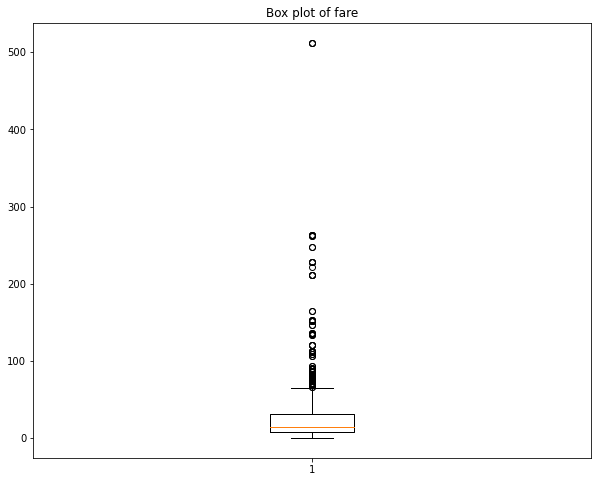

In [442]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['Fare'])
plt.title('Box plot of fare')

In [443]:
#Finding the percentiles and interquadrilerange (IQR)

In [444]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

In [445]:
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)

Q1- 7.9104
Q2- 14.4542
Q3- 31.0


In [446]:
data['Fare'].median()

14.4542

In [447]:
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)

IQR- 23.0896


In [448]:
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)

low_limit- -26.724
upper_limit- 65.6344


In [449]:
# Finding the outliners based on the upper an lower limit

In [450]:
out = pd.DataFrame()
out['outlier'] = data[(data['Fare']<low_limit) | (data['Fare']>upper_limit)]['Fare']

In [451]:
out

,outlier
PassengerId,
2,71.2833
28,263.0000
32,146.5208
35,82.1708
53,76.7292
...,...
847,69.5500
850,89.1042
857,164.8667


In [452]:
# Removing the ouliners

In [453]:
#data.drop((data['Fare']<low_limit) | (data['Fare']>upper_limit),axis=0)
ind1= (data['Fare']<low_limit) | (data['Fare']>upper_limit)
#ind = data.loc((data['Fare']<low_limit) | (data['Fare']>upper_limit)).index

data.drop(data.loc[ind1].index,inplace=True)

Text(0.5, 1.0, 'Box plot of fare')

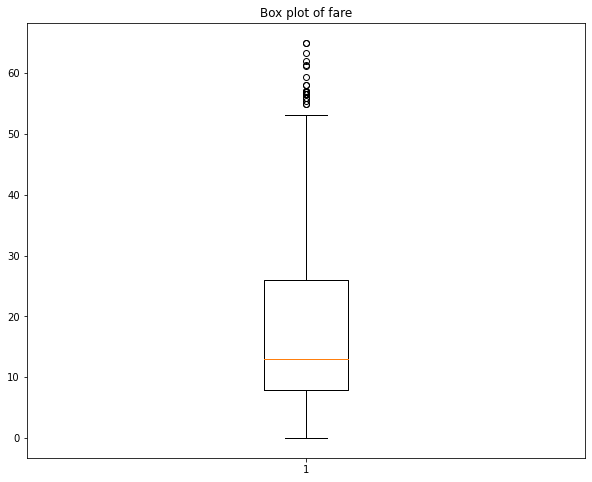

In [454]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['Fare'])
plt.title('Box plot of fare')

### Age Column

In [455]:
# Checking the ouliners in the Age feature

Text(0.5, 1.0, 'Box plot of Age')

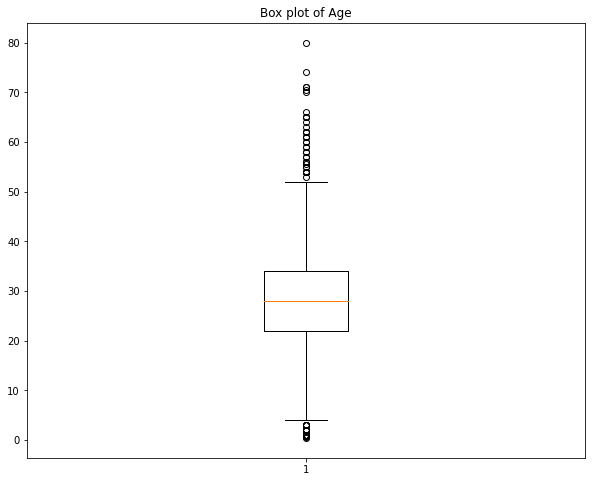

In [456]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [457]:
#Finding the percentiles and interquadrilerange (IQR)

In [458]:
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

In [459]:
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
data['Age'].median()

Q1- 22.0
Q2- 28.0
Q3- 34.0


28.0

In [460]:
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)

IQR- 12.0


In [461]:
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)

low_limit- 4.0
upper_limit- 52.0


In [462]:
# Finding the outliners based on the upper an lower limit

In [463]:
out = pd.DataFrame()
out['outlier'] = data[(data['Age']<low_limit) | (data['Age']>upper_limit)]['Age']
out

,outlier
PassengerId,
7,54.00
8,2.00
12,58.00
16,55.00
17,2.00
...,...
804,0.42
825,2.00
828,1.00


In [464]:
# Removing the ouliners

In [465]:
#data.drop((data['Fare']<low_limit) | (data['Fare']>upper_limit),axis=0)
ind1= (data['Age']<low_limit) | (data['Age']>upper_limit)
#ind = data.loc((data['Fare']<low_limit) | (data['Fare']>upper_limit)).index

data.drop(data.loc[ind1].index,inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

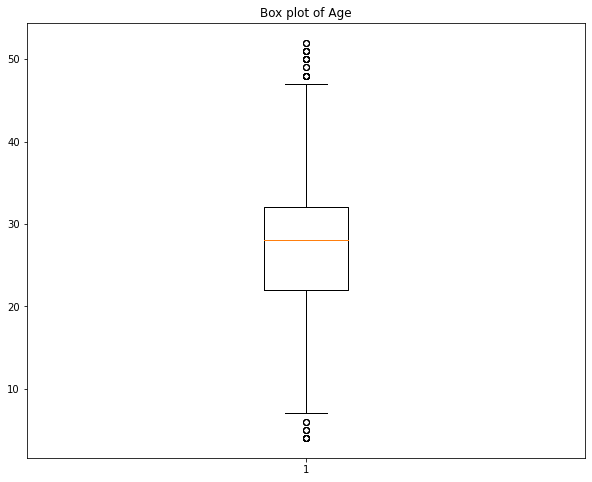

In [466]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

### SibSp Column

In [467]:
# Checking the ouliners in the SibSp feature

Text(0.5, 1.0, 'Box plot of SibSp')

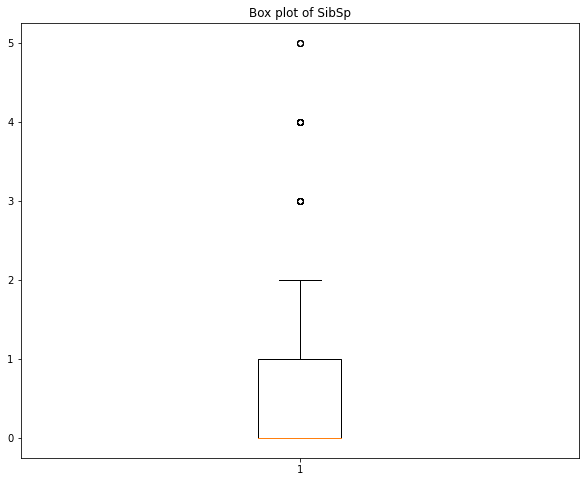

In [468]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [469]:
#Finding the percentiles and interquadrilerange (IQR)

In [470]:
Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
data['SibSp'].median()

Q1- 0.0
Q2- 0.0
Q3- 1.0


0.0

In [471]:
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)

IQR- 1.0


In [472]:
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)

low_limit- -1.5
upper_limit- 2.5


In [473]:
# Finding the outliners based on the upper an lower limit

In [474]:
out = pd.DataFrame()
out['outlier'] = data[(data['SibSp']<low_limit) | (data['SibSp']>upper_limit)]['SibSp']
out

,outlier
PassengerId,
25,3
51,4
60,5
64,3
69,4
72,5
86,3
172,4
177,3


In [475]:
# Removing the ouliners

In [476]:
#data.drop((data['Fare']<low_limit) | (data['Fare']>upper_limit),axis=0)
ind1= (data['SibSp']<low_limit) | (data['SibSp']>upper_limit)
#ind = data.loc((data['Fare']<low_limit) | (data['Fare']>upper_limit)).index

data.drop(data.loc[ind1].index,inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

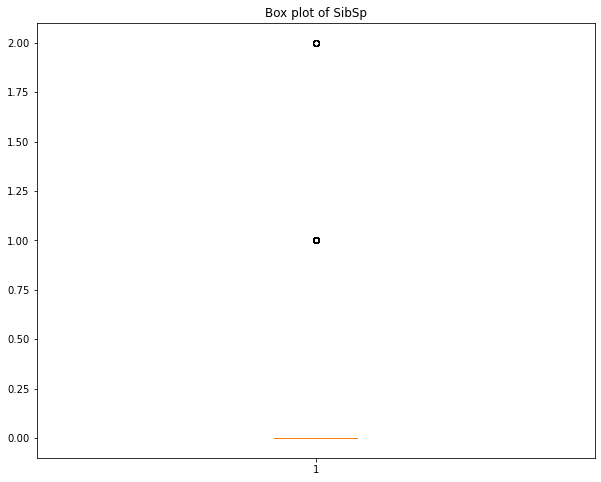

In [477]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

Text(0.5, 1.0, 'Box plot of Survived')

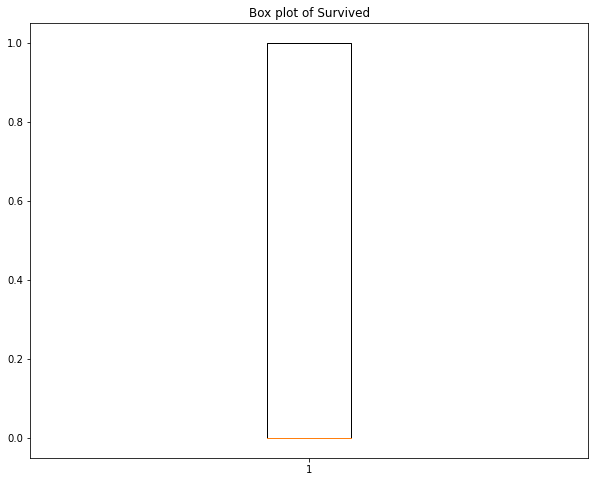

In [478]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['Survived'])
plt.title('Box plot of Survived')

In [479]:
# Checking ouliners for Pclass

Text(0.5, 1.0, 'Box plot of Pclass')

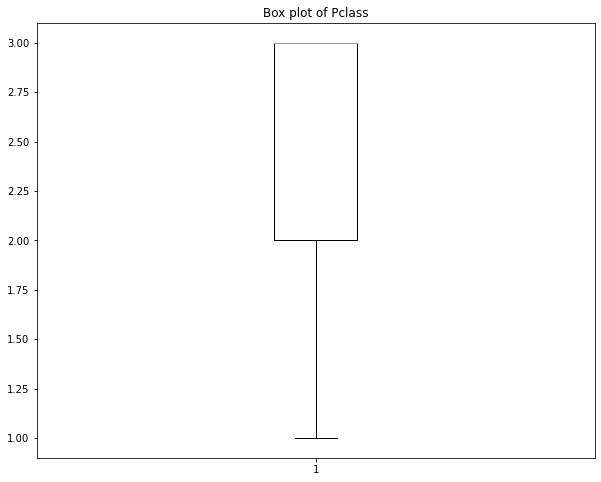

In [480]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

## Do min max scaling on the feature set (Take ‘Survived’ as target)

In [482]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [494]:
# Checking the correlation matrix

In [483]:
corrMartix = data.corr()

<AxesSubplot:>

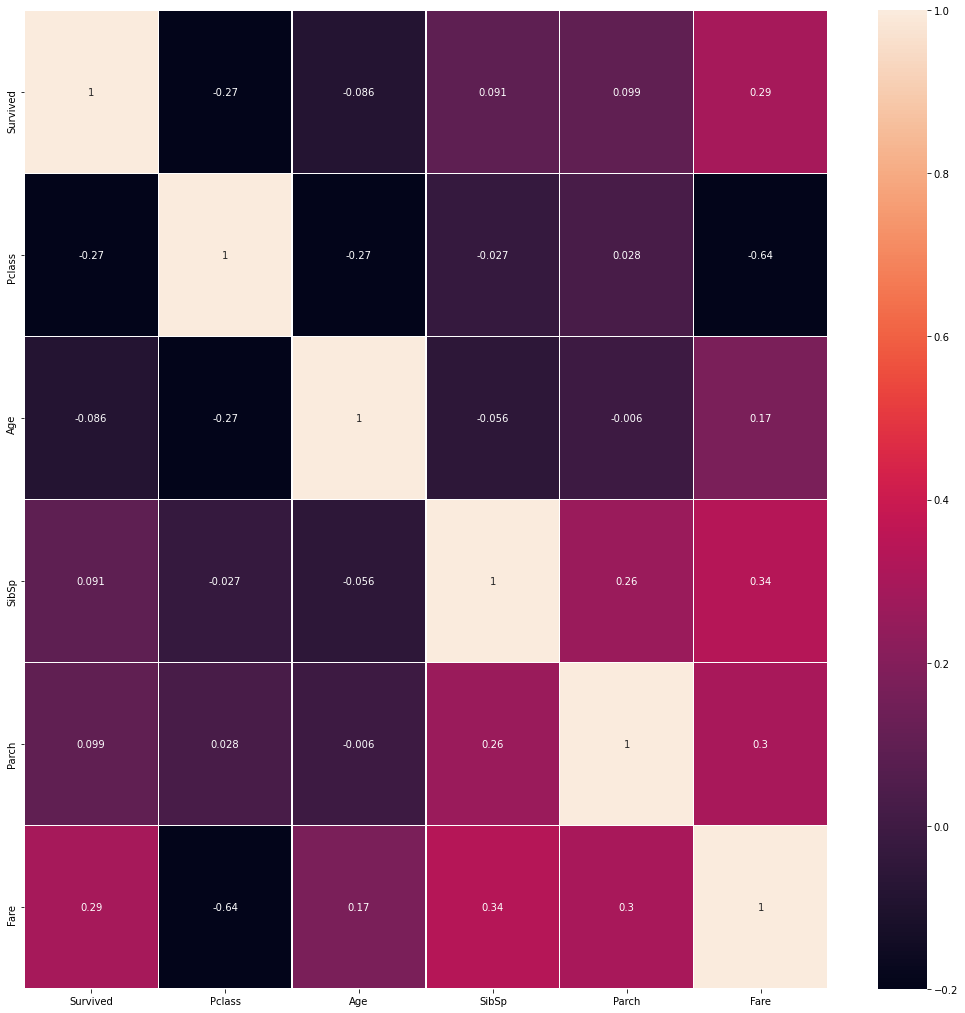

In [484]:
plt.subplots(figsize=(18, 18))
sns.heatmap(corrMartix,vmin=-.2,vmax=1,annot=True,linewidth=0.2)

#### Fare and Pclass has a higher correlation so we may drop one feature
#### There is a  low correlation between Pclass and survived and Fare and Survived

In [380]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [485]:
# Drop other categorical features from X

In [486]:
y = data["Survived"]
X = data.drop(["Survived","Name","Sex","Ticket","Cabin","Embarked"], axis=1)
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [487]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [488]:
print("MSE is ",mean_squared_error(y_test,predictions))
print("r squared is ",format(r2_score(y_test,predictions), '.8f'))

MSE is  0.18668451454230808
r squared is  0.10803237


In [229]:
X.describe()

,Age,SibSp,Parch,Fare
count,681.000000,681.000000,681.000000,681.000000
mean,28.616740,0.265786,0.268722,16.590772
std,9.077604,0.495410,0.753252,13.260513
min,4.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.854200
50%,28.000000,0.000000,0.000000,10.500000
75%,33.000000,0.000000,0.000000,23.250000
max,52.000000,2.000000,6.000000,65.000000


### Do min max scaling

In [490]:
#Do min max Scaler

In [230]:
minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)

In [231]:
X = pd.DataFrame(X)
X.describe()

,0,1,2,3
count,681.000000,681.000000,681.000000,681.000000
mean,0.512849,0.132893,0.044787,0.255243
std,0.189117,0.247705,0.125542,0.204008
min,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.120834
50%,0.500000,0.000000,0.000000,0.161538
75%,0.604167,0.000000,0.000000,0.357692
max,1.000000,1.000000,1.000000,1.000000


In [232]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [233]:
print("MSE is ",mean_squared_error(y_test,predictions))
print("r squared is ",format(r2_score(y_test,predictions), '.8f'))

MSE is  0.19133537295186615
r squared is  0.08581084


#### Min max scaling hasn't improved the model performance

### Encoding and min max scaling

In [234]:
#Do encoding

##### Since the Name, Ticket and Cabin field has more unique values, we can drop these colums rather than converting it using encoding

In [235]:
X = data.drop(["Survived","Name","Ticket","Cabin"], axis=1)
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
6,3,28.0,0,0,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,1
889,3,28.0,1,2,23.4500,1,0,0,0,1


<AxesSubplot:>

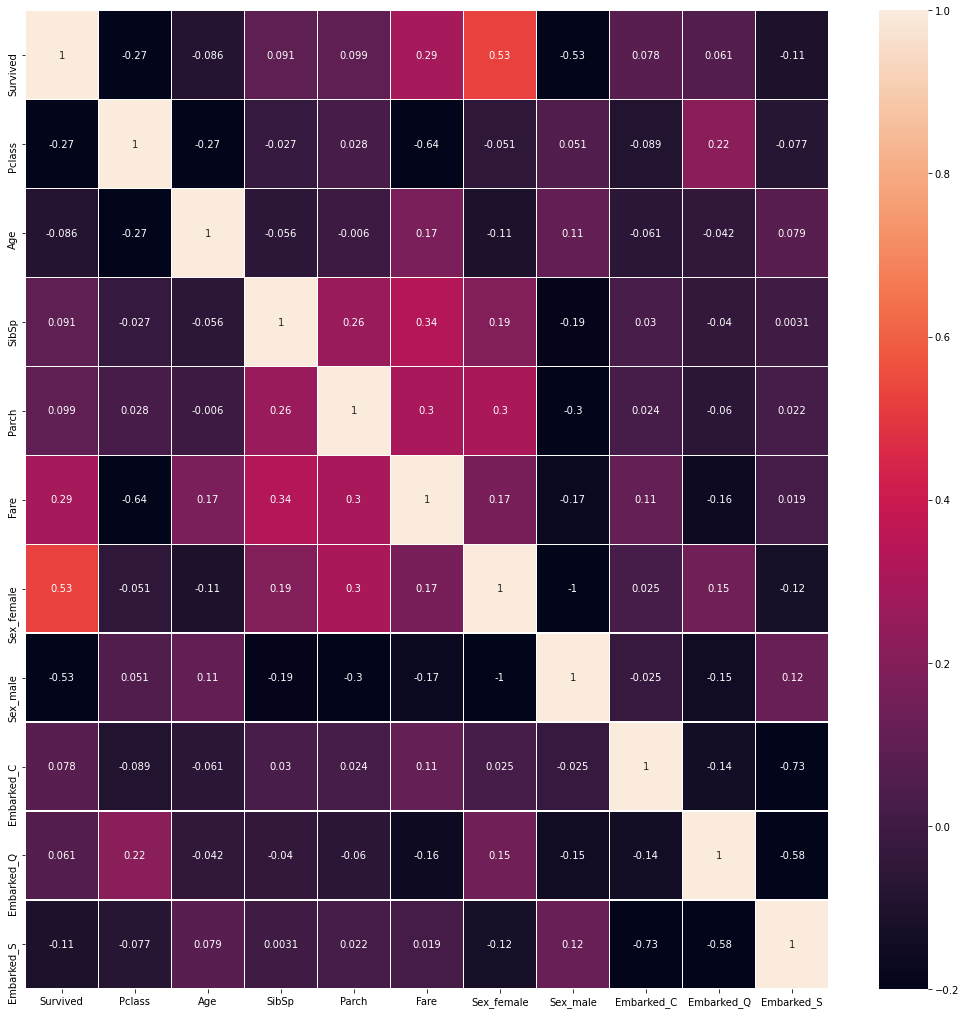

In [236]:
data1 = data.drop(["Name","Ticket","Cabin"], axis=1)
data1 = pd.get_dummies(data1)
corrMartix = data1.corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corrMartix,vmin=-.2,vmax=1,annot=True,linewidth=0.2)

    There is a higher negative correlation between sex_male and Survived. 
    There is higher positive correlation between  sex_Female and Survived. 

In [491]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [492]:
print("MSE is ",mean_squared_error(y_test,predictions))
print("r squared is ",format(r2_score(y_test,predictions), '.8f'))

MSE is  0.18668451454230808
r squared is  0.10803237


In [240]:
X = X.drop(["Parch","SibSp"], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MSE is ",mean_squared_error(y_test,predictions))
print("r squared is ",format(r2_score(y_test,predictions), '.8f'))

MSE is  0.13496750465434695
r squared is  0.35513320


     The Encoding helped to improve the model performance the r-squared value also increased after encoding

In [241]:
# Do encoded and min max scaler

In [242]:
X

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,3,22.0,7.2500,0,1,0,0,1
3,3,26.0,7.9250,1,0,0,0,1
4,1,35.0,53.1000,1,0,0,0,1
5,3,35.0,8.0500,0,1,0,0,1
6,3,28.0,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...
887,2,27.0,13.0000,0,1,0,0,1
888,1,19.0,30.0000,1,0,0,0,1
889,3,28.0,23.4500,1,0,0,0,1


In [243]:
minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.750367,0.512849,0.255243,0.312775,0.687225,0.151248,0.099853,0.748899
std,0.360886,0.189117,0.204008,0.463964,0.463964,0.358554,0.300024,0.433965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.395833,0.120834,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.500000,0.161538,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.604167,0.357692,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [244]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MSE is ",mean_squared_error(y_test,predictions))
print("r squared is ",format(r2_score(y_test,predictions), '.8f'))

MSE is  0.13496750465434698
r squared is  0.35513320


#### Encoding improved the model but min max scaling does not help the regression model